# Qiuck EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/league-matches-4.csv')
df.head()

id  homeID  awayID  roundID  game_week   date_unix  btts_potential  \
0  453873     149     108     3547          1  1533927600               0   
1  453874     157      92     3547          1  1533987000               0   
2  453875     148     161     3547          1  1533996000               0   
3  453876     162     143     3547          1  1533996000               0   
4  453877     217     152     3547          1  1533996000               0   

   btts_fhg_potential  btts_2hg_potential  o45_potential  ...  \
0                   0                   0              0  ...   
1                   0                   0              0  ...   
2                   0                   0              0  ...   
3                   0                   0              0  ...   
4                   0                   0              0  ...   

   pre_match_teamB_overall_ppg  team_a_xg_prematch  team_b_xg_prematch  \
0                          0.0                 0.0                 0.0   
1                          0.0                 0.0                 0.0   
2                          0.0                 0.0                 0.0   
3                          0.0                 0.0                 0.0   
4                          0.0                 0.0                 0.0   

   total_xg_prematch     season    status  \
0                0.0  2018/2019  complete   
1                0.0  2018/2019  complete   
2                0.0  2018/2019  complete   
3                0.0  2018/2019  complete   
4                0.0  2018/2019  complete   

                                        stadium_name          home_name  \
0                          Old Trafford (Manchester)  Manchester United   
1              St. James' Park (Newcastle upon Tyne)   Newcastle United   
2             Vitality Stadium (Bournemouth, Dorset)    AFC Bournemouth   
3                            Craven Cottage (London)             Fulham   
4  John Smith's Stadium (Huddersfield, West Yorks...  Huddersfield Town   

           away_name  target  
0     Leicester City    home  
1  Tottenham Hotspur    away  
2       Cardiff City    home  
3     Crystal Palace    away  
4            Chelsea    away  

[5 rows x 111 columns]

In [9]:
cats = np.load('data/cats.npy')
df[cats] = df[cats].astype(object)
cats

array(['matches_completed_minimum', 'refereeID', 'coach_a_ID',
       'coach_b_ID', 'homeID', 'awayID'], dtype='<U25')

In [10]:
df.select_dtypes(include='object')

homeID awayID matches_completed_minimum refereeID coach_a_ID coach_b_ID  \
0       149    108                        38       526        208        204   
1       157     92                        38       537        230        156   
2       148    161                        38       693        207        240   
3       162    143                        38       685        398       3610   
4       217    152                        38       717        403        148   
...     ...    ...                       ...       ...        ...        ...   
1808     92    152                        30       705        209       1585   
1809    152    222                        29       393       1585        621   
1810    108    152                        30       526         37       1585   
1811    152    144                        30       743       1585        197   
1812    223    152                        30       728        294      11725   

         season    status                                       stadium_name  \
0     2018/2019  complete                          Old Trafford (Manchester)   
1     2018/2019  complete              St. James' Park (Newcastle upon Tyne)   
2     2018/2019  complete             Vitality Stadium (Bournemouth, Dorset)   
3     2018/2019  complete                            Craven Cottage (London)   
4     2018/2019  complete  John Smith's Stadium (Huddersfield, West Yorks...   
...         ...       ...                                                ...   
1808  2022/2023  complete                 Tottenham Hotspur Stadium (London)   
1809  2022/2023  complete                           Stamford Bridge (London)   
1810  2022/2023  complete     King Power Stadium (Leicester, Leicestershire)   
1811  2022/2023  complete                           Stamford Bridge (London)   
1812  2022/2023  complete    Molineux Stadium (Wolverhampton, West Midlands)   

                    home_name          away_name target  
0           Manchester United     Leicester City   home  
1            Newcastle United  Tottenham Hotspur   away  
2             AFC Bournemouth       Cardiff City   home  
3                      Fulham     Crystal Palace   away  
4           Huddersfield Town            Chelsea   away  
...                       ...                ...    ...  
1808        Tottenham Hotspur            Chelsea   home  
1809                  Chelsea       Leeds United   home  
1810           Leicester City            Chelsea   away  
1811                  Chelsea            Everton   draw  
1812  Wolverhampton Wanderers            Chelsea   home  

[1813 rows x 12 columns]

In [6]:
sns.catplot(df, y='game_week', x='target', kind="box")

In [16]:
df[['target', 'homeID']]

target homeID
0      home    149
1      away    157
2      home    148
3      away    162
4      away    217
...     ...    ...
1808   home     92
1809   home    152
1810   away    108
1811   draw    152
1812   home    223

[1813 rows x 2 columns]

<Axes: >

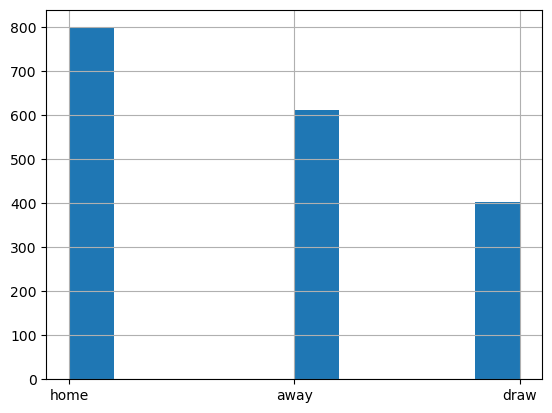

In [17]:
df['target'].hist()

In [18]:
cats = df.select_dtypes(include='object').columns.values


def analyse_cats(df, cat_cols):
    d = pd.DataFrame()
    cl = []
    u = []
    s = []
    nans = []
    for c in cat_cols:
        cl.append(c)
        u.append(df[c].unique())
        s.append(df[c].unique().size)
        nans.append(df[c].isnull().sum())

    d['"feat"'] = cl
    d["uniques"] = u
    d["cardinality"] = s
    d["nans"] = nans
    return d


catanadf = analyse_cats(df, cats)
catanadf

"feat"  \
0                      homeID   
1                      awayID   
2   matches_completed_minimum   
3                   refereeID   
4                  coach_a_ID   
5                  coach_b_ID   
6                      season   
7                      status   
8                stadium_name   
9                   home_name   
10                  away_name   
11                     target   

                                              uniques  cardinality  nans  
0   [149, 157, 148, 162, 217, 155, 223, 151, 146, ...           27     0  
1   [108, 92, 161, 143, 152, 209, 144, 153, 145, 9...           27     0  
2                                    [38, 29, 28, 30]            4     0  
3   [526, 537, 693, 685, 717, 688, 360, 461, 707, ...           30     0  
4   [208, 230, 207, 398, 403, 621, 142, 85, 203, 1...           71     0  
5   [204, 156, 240, 3610, 148, 245, 214, 225, 197,...           70     0  
6   [2018/2019, 2019/2020, 2020/2021, 2021/2022, 2...            5     0  
7                                          [complete]            1     0  
8   [Old Trafford (Manchester), St. James' Park (N...           29     0  
9   [Manchester United, Newcastle United, AFC Bour...           27     0  
10  [Leicester City, Tottenham Hotspur, Cardiff Ci...           27     0  
11                                 [home, away, draw]            3     0

In [33]:
sns.pairplot(df, x_vars=df.select_dtypes('int').iloc[:, 5:10].columns, y_vars='target')

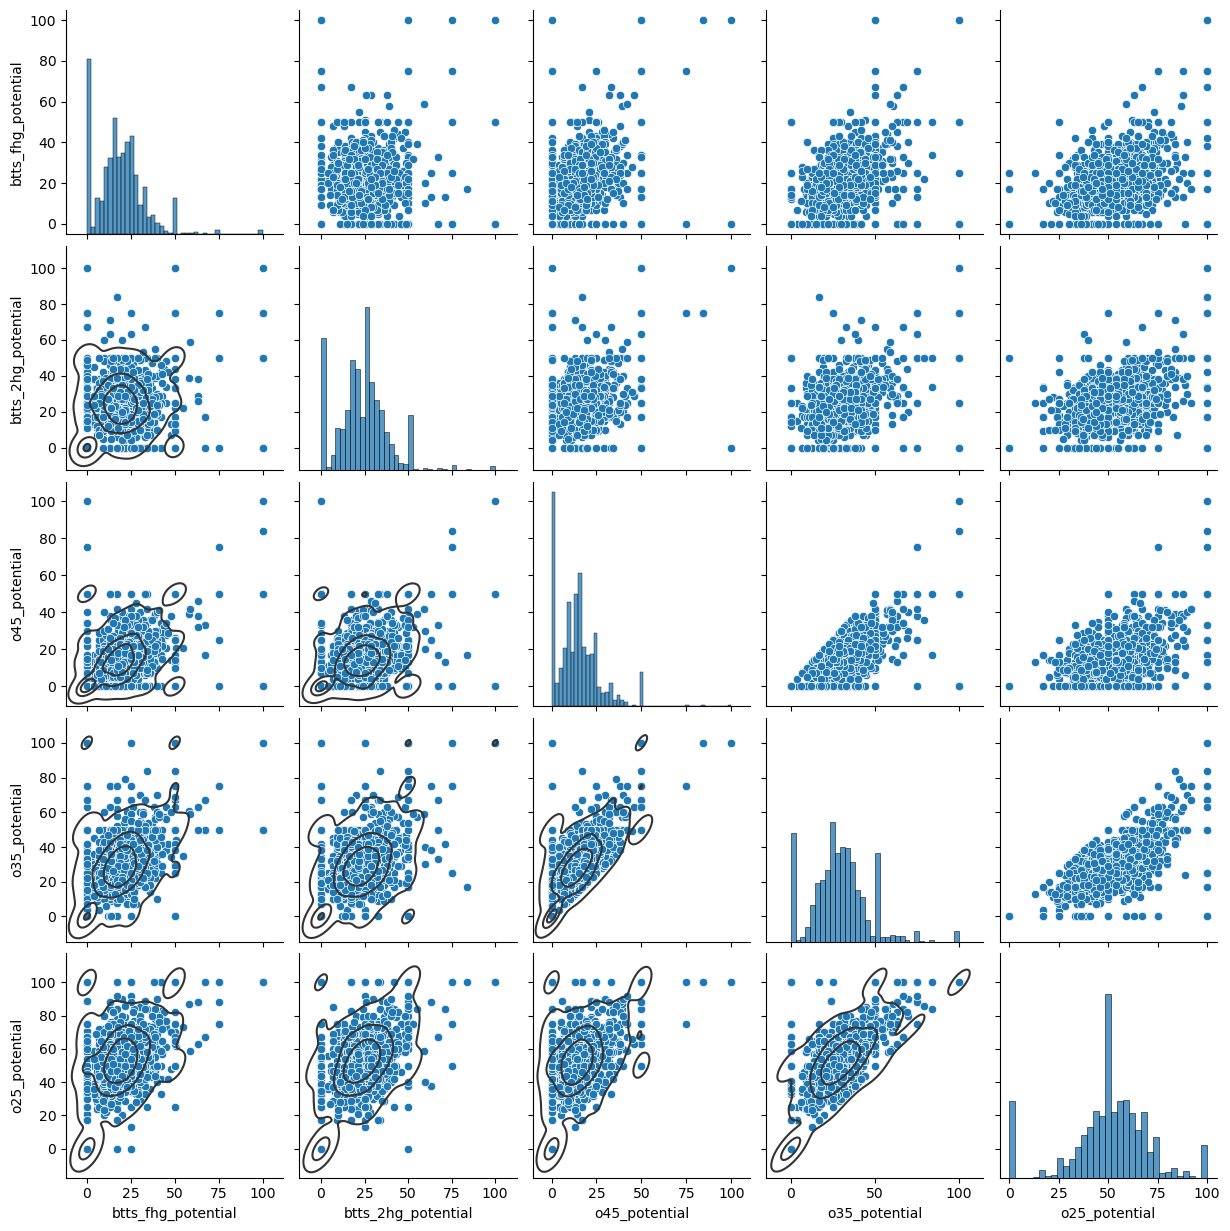

In [35]:
g = sns.pairplot(df.select_dtypes('int').iloc[:, 5:10])
g.map_lower(sns.kdeplot, levels=4, color=".2")

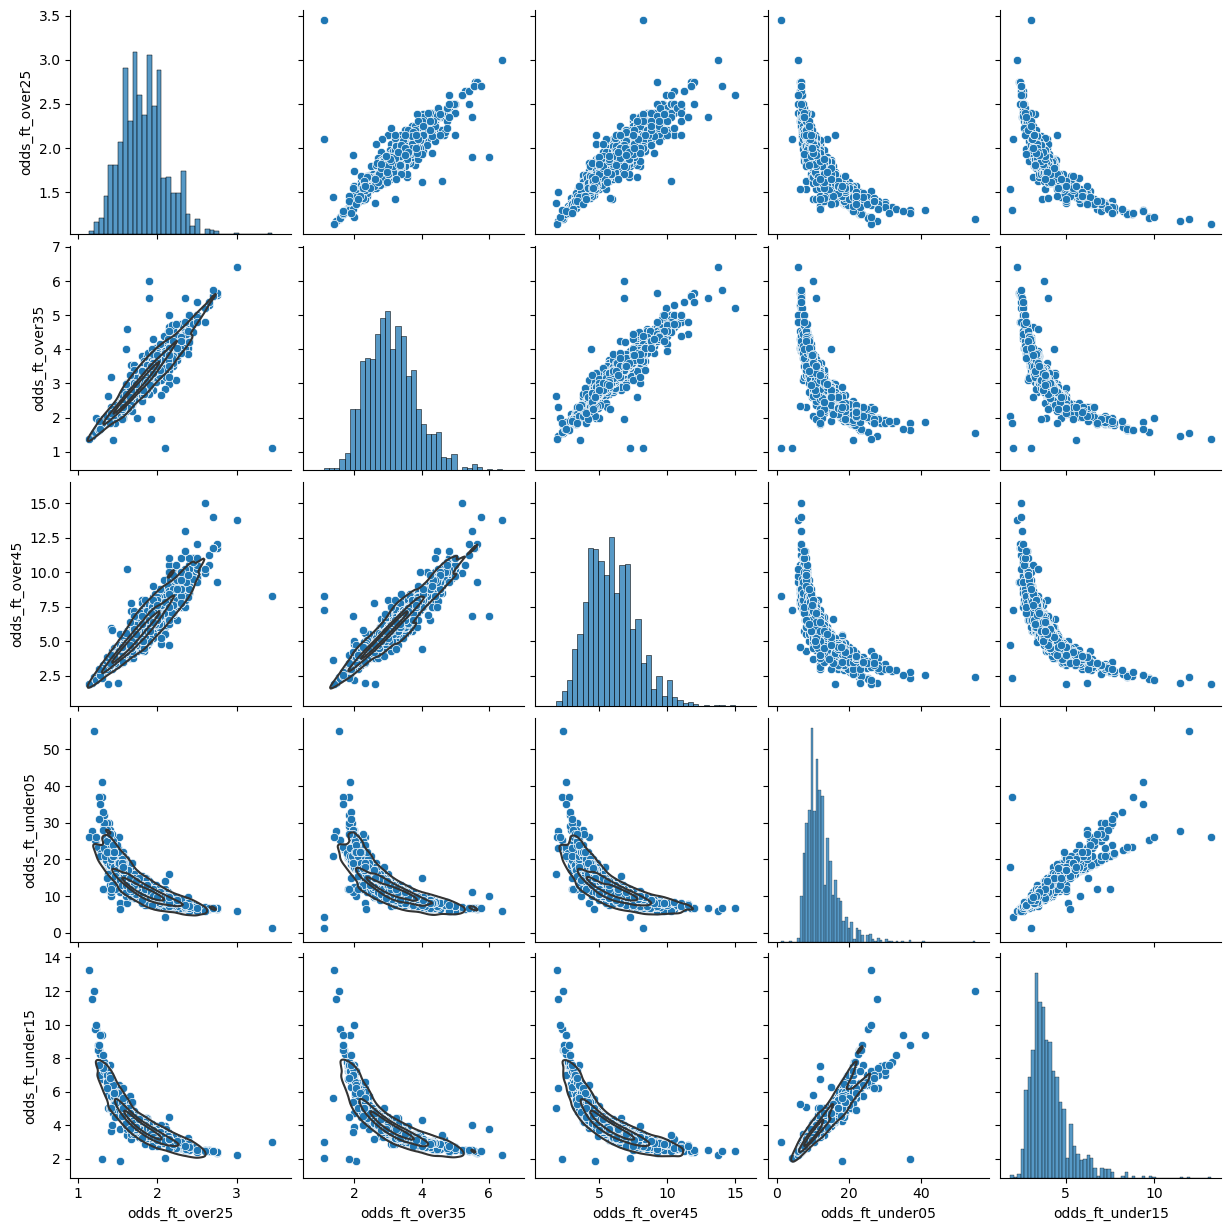

In [36]:
g = sns.pairplot(df.select_dtypes('float').iloc[:, 5:10])
g.map_lower(sns.kdeplot, levels=4, color=".2")